In [1]:
import sys
sys.path.append('../')
import mobipy
import mobipy.optim as opt
import mobipy.stats as stat
import mobipy.plotting as mplt
import mobipy.MAGIC as magicopt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
modfile = mobipy.mobius2_path() + 'models/magic_model_simple.txt'
datfile = mobipy.mobius2_path() + 'models/example_data/MAGIC/birkenes_uncalibrated.dat'
app = mobipy.Model_Application.build_from_model_and_data_file(modfile, datfile)

sl = slice(app.start_date[()], app.end_date[()])

app.run()

True

Calibrate NO3
Calibrate base cations
Calibrate river organic acids


(<Figure size 1000x500 with 1 Axes>, <Axes: xlabel='Date'>)

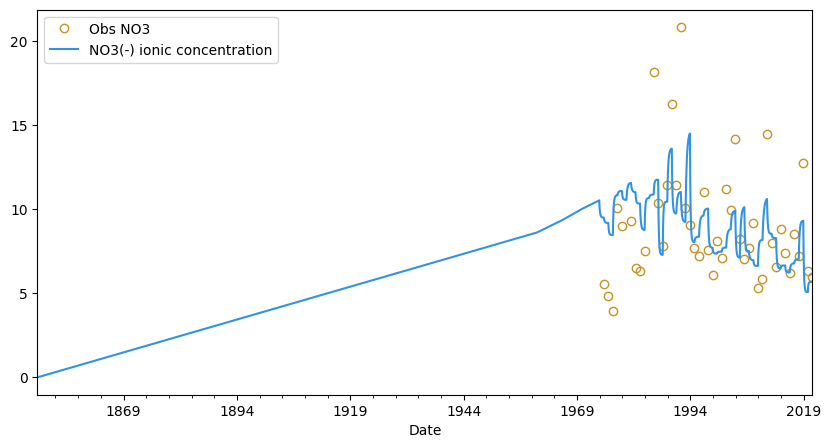

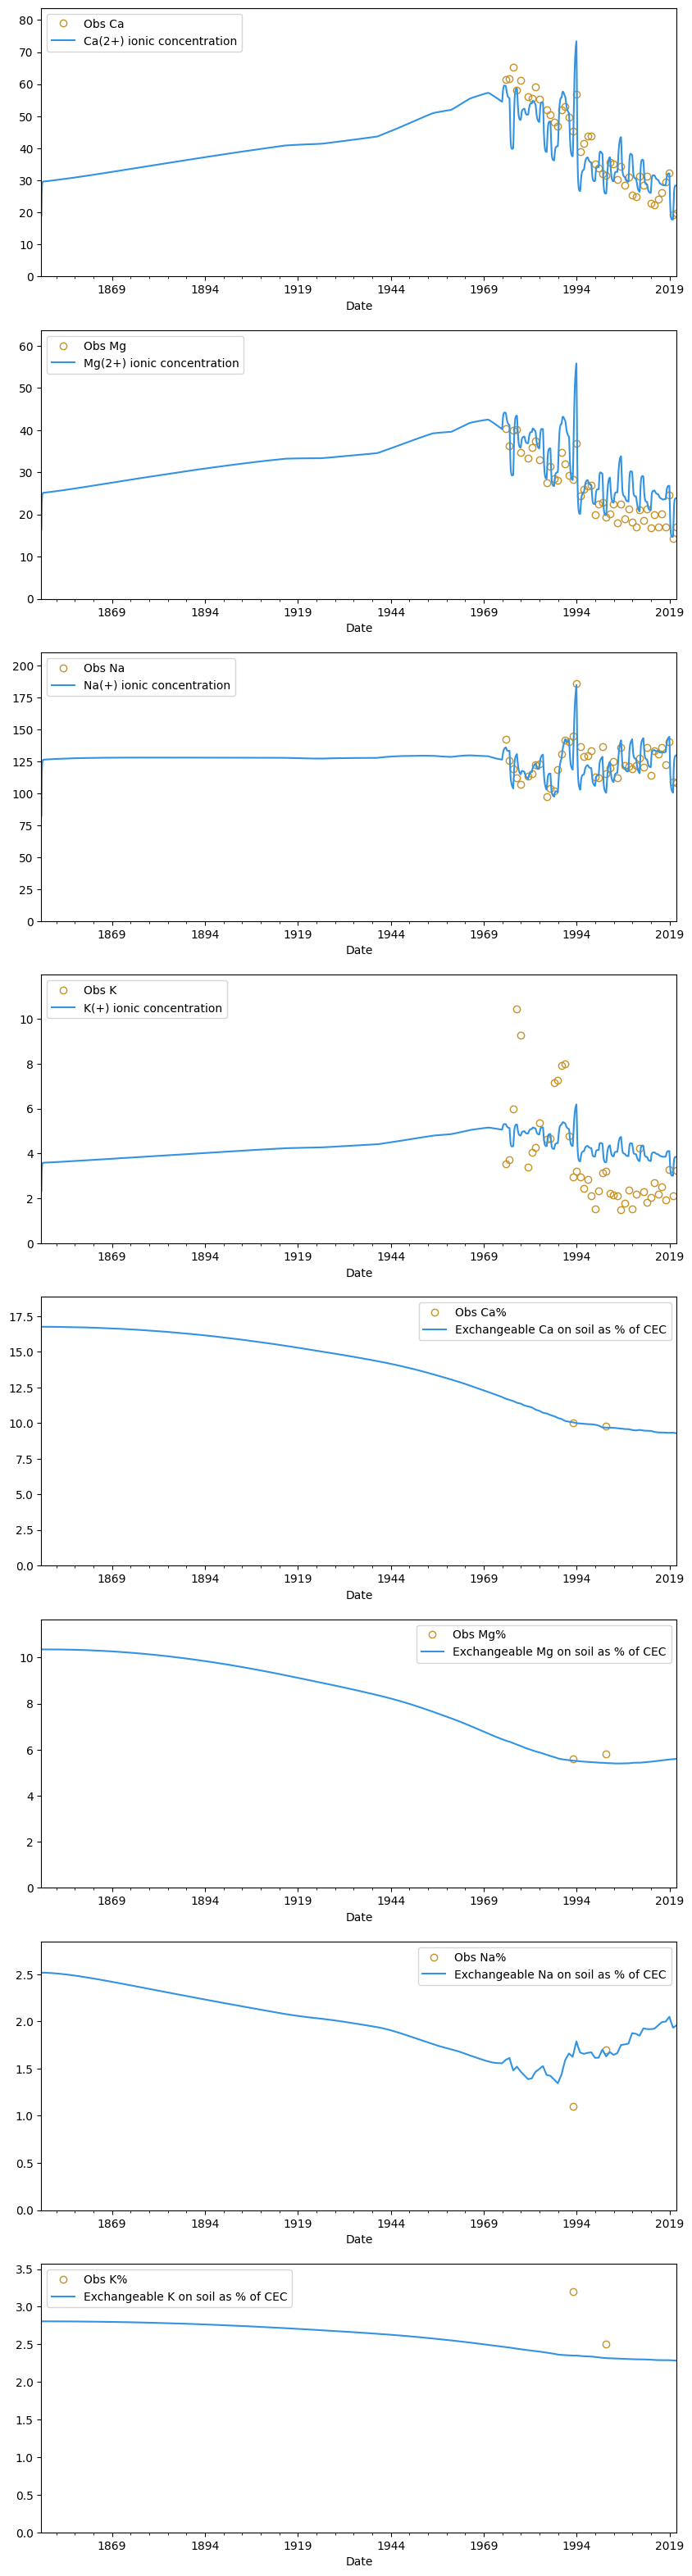

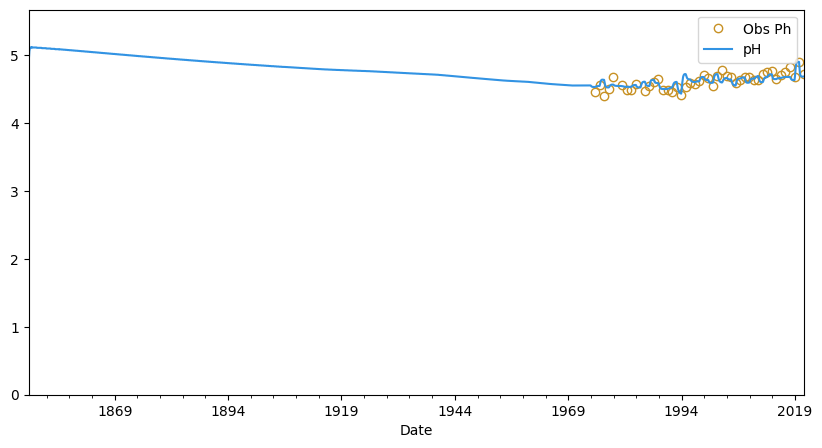

In [3]:
# Calibrate NO3
print("Calibrate NO3")
params, set_params, no3_target, get_sim_obs = magicopt.get_no3_setup(app, calib_index='Soil', obs_index='River', obsname='Obs NO3')
res_opt = opt.run_minimizer(app, params, set_params, get_sim_obs)
set_params(app, res_opt.params)
app.run()

# Run a second NO3 calibration for the river/lake if needed here

# Also, you can run a TOC calibration for the soil if that is needed (at Birkenes, that was determined using another method)

# Calibrate base cation weathering separately
#params, set_params, w_target, get_sim_obs = magicopt.get_base_cation_weathering_setup(app, calib_index='Soil', obs_index='River', obsname='Obs %s')
#res_opt = opt.run_minimizer(app, params, set_params, get_sim_obs)
#set_params(app, res_opt.params)
#app.run()

# Calibrate base cation initial fractions separately
#params, set_params, init_target, get_sim_obs = magicopt.get_base_cation_exchangeable_fractions_setup(app, calib_index='Soil', obsname='Obs %s%%') 
#res_opt = opt.run_minimizer(app, params, set_params, get_sim_obs)
#set_params(app, res_opt.params)
#app.run()

#mplt.plot_targets(app, w_target, sl)
#mplt.plot_targets(app, init_target, sl)

print("Calibrate base cations")
# Combined base cation setup (higher accuracy, but slower)
params, set_params, bc_target, get_sim_obs = magicopt.get_base_cation_combined_setup(
    app, 
    calib_index='Soil', 
    obs_index='River', 
    obsname_c='Obs %s', 
    obsname_bs='Obs %s%%'
)

res_opt = opt.run_minimizer(app, params, set_params, get_sim_obs)
set_params(app, res_opt.params)
app.run()

print("Calibrate river organic acids")
params, set_params, ph_target, get_sim_obs = magicopt.get_ph_setup(app, calib_index='River', obsname='Obs Ph')
res_opt = opt.run_minimizer(app, params, set_params, get_sim_obs)
set_params(app, res_opt.params)
app.run()

mplt.plot_targets(app, no3_target, sl)
mplt.plot_targets(app, bc_target, sl)
mplt.plot_targets(app, ph_target, sl)

In [4]:
outfile = mobipy.mobius2_path() + 'models/example_data/MAGIC/birkenes_calibrated.dat'
app.save_data_set(outfile)